In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

In [3]:
data = pd.read_csv(r'Breast_Cancer.csv')

In [4]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
data.shape

(569, 33)

In [25]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [8]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [9]:
data = data.drop('Unnamed: 32', axis=1)

In [10]:
data.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [11]:
le = preprocessing.LabelEncoder()

df = (data.apply(le.fit_transform))

In [12]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,41,1,370,1,455,452,444,531,521,526,...,425,41,497,516,358,516,520,483,485,506
1,42,1,426,186,486,513,120,215,321,396,...,419,199,465,511,158,210,278,401,222,375
2,488,1,406,324,478,487,403,459,478,516,...,399,261,455,491,287,464,438,468,445,361
3,489,1,98,297,164,95,471,533,507,493,...,215,298,281,194,408,524,511,479,499,533
4,490,1,418,60,493,506,332,414,480,492,...,381,28,453,470,239,245,415,363,81,216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,381,1,438,370,503,522,410,364,509,522,...,426,293,480,518,263,255,423,453,21,133
565,382,1,413,463,483,499,295,312,415,483,...,401,494,459,493,116,218,350,364,152,63
566,383,1,340,458,410,421,115,308,329,335,...,328,460,390,413,106,371,366,317,40,244
567,384,1,429,467,500,501,442,530,530,531,...,431,500,497,502,367,525,534,482,472,514


In [13]:
df.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,-0.079866,0.044328,0.129510,0.042901,0.043208,-0.069242,-0.001564,0.000656,-0.002819,...,0.025500,0.079345,0.029530,0.024084,-0.078956,-0.011306,-0.013115,-0.012864,-0.065463,-0.090993
diagnosis,-0.079866,1.000000,0.742827,0.458623,0.747092,0.734770,0.372423,0.605768,0.732390,0.779702,...,0.793618,0.475669,0.785825,0.785522,0.426936,0.607784,0.704746,0.779755,0.397952,0.310819
radius_mean,0.044328,0.742827,1.000000,0.345239,0.995636,0.998156,0.160984,0.503571,0.653984,0.768864,...,0.978884,0.318047,0.969468,0.977448,0.133004,0.492684,0.600307,0.732001,0.177525,0.046240
texture_mean,0.129510,0.458623,0.345239,1.000000,0.345625,0.342979,0.021744,0.262162,0.339786,0.305719,...,0.368990,0.909716,0.368970,0.365995,0.099222,0.289511,0.336786,0.315397,0.117986,0.114304
perimeter_mean,0.042901,0.747092,0.995636,0.345625,1.000000,0.996984,0.183623,0.541462,0.679614,0.788028,...,0.980044,0.321515,0.979124,0.981099,0.155454,0.534041,0.631062,0.755436,0.199524,0.087578
area_mean,0.043208,0.734770,0.998156,0.342979,0.996984,1.000000,0.141610,0.488167,0.642225,0.756440,...,0.978752,0.317042,0.971694,0.980467,0.119888,0.485374,0.593589,0.722511,0.171499,0.038061
smoothness_mean,-0.069242,0.372423,0.160984,0.021744,0.183623,0.141610,1.000000,0.678077,0.517615,0.567139,...,0.210766,0.060254,0.221997,0.192574,0.800043,0.482157,0.430257,0.500685,0.389136,0.507820
compactness_mean,-0.001564,0.605768,0.503571,0.262162,0.541462,0.488167,0.678077,1.000000,0.896145,0.848325,...,0.544721,0.253131,0.585344,0.528761,0.583053,0.900967,0.837517,0.824822,0.448559,0.687206
concavity_mean,0.000656,0.732390,0.653984,0.339786,0.679614,0.642225,0.517615,0.896145,1.000000,0.927381,...,0.686228,0.334521,0.714769,0.674262,0.490080,0.849735,0.938586,0.904064,0.384047,0.541612
concave points_mean,-0.002819,0.779702,0.768864,0.305719,0.788028,0.756440,0.567139,0.848325,0.927381,1.000000,...,0.792950,0.300847,0.809138,0.780010,0.493074,0.758364,0.827513,0.936857,0.357440,0.420894


M: 212
B: 357


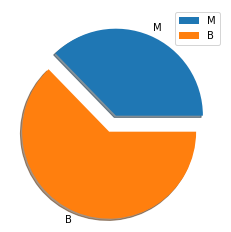

In [14]:
df_mal = len(df['diagnosis'][df.diagnosis == 1])
df_ben = len(df['diagnosis'][df.diagnosis == 0])

print('M:', df_mal)
print('B:', df_ben)

arr = np.array([df_mal, df_ben])

labels = ['M', 'B']

plt.pie(arr, labels=labels, explode=[0.0, 0.2], shadow=True)
plt.legend()

In [15]:
from sklearn.model_selection import train_test_split

x = df.drop('diagnosis', axis=1)
y = df['diagnosis']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 31)
(114, 31)
(455,)
(114,)


In [16]:
# scaler = preprocessing.StandardScaler().fit(x_train)

# scaled_x = scaler.transform(x_train)

# scaled_x

In [17]:
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lr = make_pipeline(StandardScaler(), LogisticRegression()).fit(x_train, y_train)

In [18]:
lr_pred = lr.predict(x_test)
print(lr_pred)

[0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0
 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 0 1 1 0 1
 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1
 1 0 1]


In [19]:
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y_test, lr_pred))

Accuracy: 0.9385964912280702


In [20]:
import joblib

joblib.dump(lr, 'breast-cancer-logreg.pkl')

['breast-cancer-logreg.pkl']